# s05: Ordinary Least Squares

If you recall, in an early notebook, we introduced the notion of fitting a line, or a linear model, to some data. We can then use the definition of that line to predict new data points. However, what we didn't dig into at that point was how we learn and evaluate our linear model, and how to learn the best model.

To do so, we need a way to measure how good our model is, or an error measurement, that we can use to evaluate our model. Together with a procedure to update models, we can try and learn models that minimize error - that is to say, models that best fit the data. 

Ordinary least squares is on such approach for learning and evaluating models. OLS seeks to minimize the sum squared errors. Squared errors are calculated as the square of the difference between the model prediction of a data point, and the data point itself. One way to think about this is as an error function - OLS defines how we will calculate the error of a model, given the data. The model with the lowest error, defined in terms of OLS, is the best model. When we talk about fitting a model with OLS, we mean finding the solution that has the lowest OLS error - the lowest value for the sum of squared errors.

<div class="alert alert-success">
Ordinary least squares (OLS) means minimizing the error of the sum of squares between the predictions made by the model, and the observed data. 
</div>

<div class="alert alert-info">
Find more information on OLS on
<a href="https://en.wikipedia.org/wiki/Ordinary_least_squares" class="alert-link">wikipedia</a>
check out this cool 
<a href="http://setosa.io/ev/ordinary-least-squares-regression/" class="alert-link">interactive tool</a>
and/or check out this 
<a href="https://www.datarobot.com/blog/ordinary-least-squares-in-python/" class="alert-link">tutorial</a>
about doing OLS in Python.
</div>

For this example, we will create a minimal dataset, and explore fitting a simple linear model fit to it, using OLS.

In this case, we will be using `numpy` for measuring least squares. Note that for real datasets, this is unlikely to be how you apply models, since it will usually be more practical to use `scikit-learn` or `statsmodels` to manage all the components of model fitting full datasets, but the underlying math is all the same. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Simulate Data

In [2]:
# Create some data
# x is an evenly space array of integers
x = np.arange(0, 6)

# y is some data with underlying relationship y = (theta) * x
#  For this example, the true relation of the data is y = 2x
true_rel = 2
y = true_rel * x

# Add some noise to the y dimension
noise = np.random.normal(0, 1, len(x))
y = y + noise

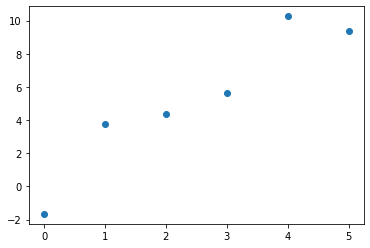

In [3]:
# Plot the data
plt.plot(x, y, '.', ms=12);

Observing the data above, we can see that there is some relation between the x and y dimension. 

We would like to measure what that relation is. That's where OLS comes in. 

OLS is a procedure to find the model (in this case, line) that minimizes the squared distances between each observed data point and the model prediction. 

In [4]:
# Reshape that data to play nice with numpy
x = np.reshape(x, [len(x), 1])
y = np.reshape(y, [len(y), 1])

### Fit an OLS Model

Numpy provides us with a function to calculuate the OLS solution. In this case, we are fitting the model:

$$y = \theta x $$

Note that we are not fitting an intercept here (no 'b' value, if you think of 'y = ax + b'). 

In this simple model, we are therefore implicitly assuming an intercept value of zero. 

You can fit intercepts (and linear models with more parameters) with OLS, you just need to add them in. 

In [5]:
# Fit the (Ordinary) Least Squares best fit line using numpy
#   This gives us a fit value (theta), and residuals (how much error we have in this fit)
theta, residuals, _, _ = np.linalg.lstsq(x, y, rcond=None)

# Pull out theta value from array
theta = theta[0][0]

In [6]:
# Check what the OLS derived solution for theta is:
print('Estimated theta value is: {:1.4f}'.format(theta))

Estimated theta value is: 2.1346


In [7]:
# Check how good our OLS solution is
print('The true relationship between y & x is: \t{:1.4f}'.format(true_rel))
print('OLS calculated relationship between y & x is: \t{:1.4f}'.format(theta))

The true relationship between y & x is: 	2.0000
OLS calculated relationship between y & x is: 	2.1346


This looks good! The absolute error between the true value, and our estimate is quite small!

In [8]:
# Check what the residuals are. Residuals are the error of the model fit
print('The residuals for the model fit are: \t{:1.4f}'.format(residuals[0]))

The residuals for the model fit are: 	10.5706


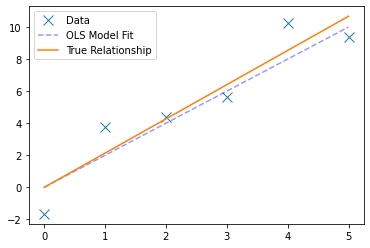

In [9]:
# Plot the raw data, with the true underlying relationship, and the OLS fit
fig, ax = plt.subplots(1)
ax.plot(x, y, 'x', markersize=10, label='Data')
ax.plot(x, 2*x, '--b', alpha=0.4, label='OLS Model Fit')
ax.plot(x, theta*x, label='True Relationship')
ax.legend();

### Predict New Data

In [10]:
# With our model, we can predict the value of a new 'x' datapoint
new_x = 2.5
pred_y = theta * new_x
print('The prediction for a new x of {} is {:1.3f}'.format(new_x, pred_y))

The prediction for a new x of 2.5 is 5.337


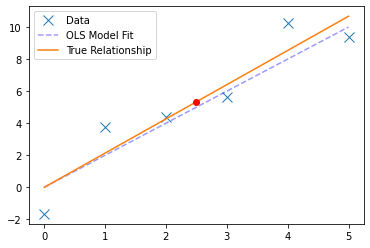

In [11]:
ax.plot(new_x, pred_y, 'or')
fig

### Recalculate Model Error

We can use the same procedure as we just used to predict new point to predict the models predictions of the data point we know, and compare these 

Note that this is the same as what the fitting procedure does, and, as well see, this should lead to calculating the same error as the model returned to us. 

In [12]:
# Calculate model predictions for our observed data points
preds = theta * x

The residuals, as returned by the OLS fit, are the just the sum of squares between the model fit and the observed data points. 

In [13]:
# Re-calculate the residuals 'by hand'
error = np.sum(np.subtract(preds, y) ** 2)

In [14]:
# Check that our residuals calculation matches the scipy implementation
print('Error, returned by the model \t\t: {:1.4f}'.format(residuals[0]))
print('Error, as recalculated residuals \t: {:1.4f}'.format(error))

Error, returned by the model 		: 10.5706
Error, as recalculated residuals 	: 10.5706


<div class="alert alert-success">
Note: In practice, you won't use numpy for OLS. Other modules, like statsmodels, have implementations of OLS more explicitly for linear modelling. </div>

<div class="alert alert-info">
See the 'LinearModels' notebook and/or 
<a href="http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html" class="alert-link">OLS in StatsModels</a>.
</div>